In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt


def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [2]:
X_train_mult, labels_train_mult, X_test_mult, labels_test_mult = load_dataset()

In [3]:
X_train_mult, labels_train_mult, X_test_mult, labels_test_mult = load_dataset()
#take only binary for 2 and 7
idx_2_7 = (labels_train_mult == 2).astype('int') + (labels_train_mult == 7).astype('int')
X_train = X_train_mult[idx_2_7.astype('bool')].astype('float')
y_train = labels_train_mult[idx_2_7.astype('bool')].astype('float')
y_train[y_train == 7] = 1
y_train[y_train == 2] = -1

In [4]:
X_train_mult, labels_train_mult, X_test_mult, labels_test_mult = load_dataset()
#take only binary for 2 and 7
idx_2_7 = (labels_train_mult == 2).astype('int') + (labels_train_mult == 7).astype('int')
X_train = X_train_mult[idx_2_7.astype('bool')].astype('float')
y_train = labels_train_mult[idx_2_7.astype('bool')].astype('float')
y_train[y_train == 7] = 1
y_train[y_train == 2] = -1
idx_2_7_test = (labels_test_mult == 2).astype('int') + (labels_test_mult == 7).astype('int')
X_test = X_test_mult[idx_2_7_test.astype('bool')].astype('float')
y_test = labels_test_mult[idx_2_7_test.astype('bool')].astype('float')
y_test[y_test == 7] = 1
y_test[y_test == 2] = -1

In [5]:
def accuracy_error(y_true, y_pred):
    """
    Trains ridge regression using closed-form solution

    Parameters
    ----------
    y_true : np.array of shape (m,)
        Vector of true labels
    y_pred : np.array of shape (m,)
        Vector of predicted labels
    
    Returns
    -------
    float
        error: 1-accuracy
    """
    return 1-np.mean(y_true == y_pred)

def mu(w, b, X, y):
    return 1/(1+np.exp(-y*(b + X.dot(w))))

def grad_w(w, b, X, y, reg_lambda):
    return np.mean(((mu(w, b, X, y) - 1)*y)[:,None]*X, axis = 0) +2*reg_lambda*w

def grad_b(w, b, X, y):
    return np.mean((mu(w, b, X, y) - 1)*y, axis = 0) 

def J(w, b, X, y, reg_lambda = 0.1):
    return np.mean(np.log(1+np.exp(-y*(b + X.dot(w))))) + reg_lambda*w.dot(w)

In [6]:
def accuracy_error(y_true, y_pred):
    """
    Trains ridge regression using closed-form solution

    Parameters
    ----------
    y_true : np.array of shape (m,)
        Vector of true labels
    y_pred : np.array of shape (m,)
        Vector of predicted labels
    
    Returns
    -------
    float
        error: 1-accuracy
    """
    return 1-np.mean(y_true == y_pred)

def mu(w, b, X, y):
    return 1/(1+np.exp(-y*(b + X.dot(w))))

def grad_w(w, b, X, y, reg_lambda):
    return np.mean(((mu(w, b, X, y) - 1)*y)[:,None]*X, axis = 0) +2*reg_lambda*w

def grad_b(w, b, X, y):
    return np.mean((mu(w, b, X, y) - 1)*y, axis = 0) 

def J(w, b, X, y, reg_lambda = 0.1):
    return np.mean(np.log(1+np.exp(-y*(b + X.dot(w))))) + reg_lambda*w.dot(w)

def grad_descent(step, X, y, reg_lambda = 0.1, w_init = None, b_init = None, max_iter = 10000):
    n, d = X.shape
    if w_init is None:
        w_init = np.zeros(d)
    if b_init is None:
        b_init = 0
    count = 0
    w = w_init
    b = b_init
    w_prev = w_init + np.inf
    conv_history = []
    w_history = []
    b_history = []
    while np.linalg.norm(w - w_prev, np.inf) >= 1e-4 and count <= max_iter:
        count += 1
        w_prev = np.copy(w)
        w = w - step*grad_w(w, b, X, y, reg_lambda)
        b = b - step*grad_b(w, b, X, y)
        conv_history.append(J(w, b, X, y, reg_lambda))
        w_history.append(w)
        b_history.append(b)
        if count%10 == 0:
            print('Iter ', count, 'Loss: ', conv_history[-1])
    return w, b, conv_history, w_history, b_history

def predict(w, b, X):
    return np.sign(b + X.dot(w))

In [7]:
def predict(w, b, X):
    return np.sign(b + X.dot(w))

In [8]:
w, b, conv_history, w_history, b_history = grad_descent(0.1, X_train, y_train, reg_lambda = 0.1, w_init = None, b_init = None, max_iter = 10000)

Iter  10 Loss:  0.26910212128149835
Iter  20 Loss:  0.24307356513167044
Iter  30 Loss:  0.23767939373136204
Iter  40 Loss:  0.23606594394298533
Iter  50 Loss:  0.23544698073788034
Iter  60 Loss:  0.23515367115848643
Iter  70 Loss:  0.23498776145656275


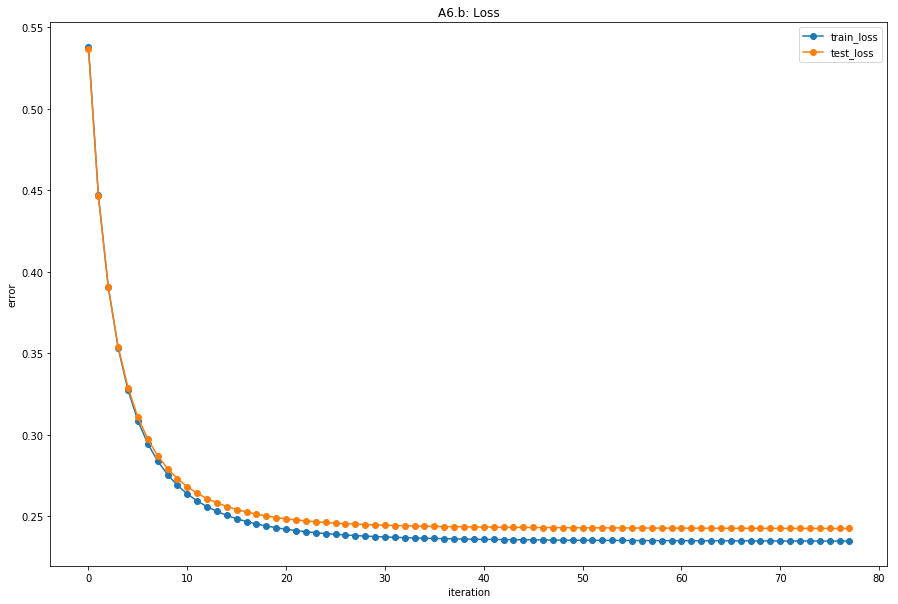

In [9]:
w, b, conv_history, w_history, b_history = grad_descent(
    0.1, X_train, y_train, reg_lambda = 0.1, w_init = None, b_init = None, max_iter = 10000)
#Part b1
train_loss = conv_history
test_loss = [J(w, b, X_test, y_test, reg_lambda = 0.1) for w, b in zip(w_history, b_history)]

plt.figure(figsize = (15,10))
plt.plot(train_loss, '-o', label = 'train_loss')
plt.plot(test_loss, '-o', label = 'test_loss')
plt.title('A6.b: Loss')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6b1.pdf')
plt.show()

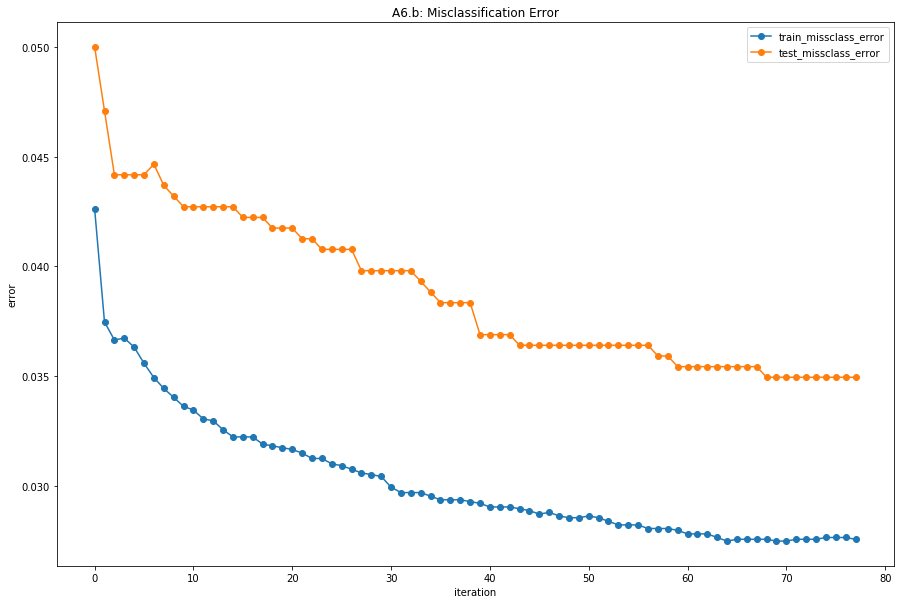

In [10]:
#Part b2
y_pred_train = [predict(w, b, X_train) for w, b in zip(w_history, b_history)]
train_missclass_error = [accuracy_error(y_train, y_pred) for y_pred in y_pred_train]

y_pred_test = [predict(w, b, X_test) for w, b in zip(w_history, b_history)]
test_missclass_error = [accuracy_error(y_test, y_pred) for y_pred in y_pred_test]

plt.figure(figsize = (15,10))
plt.plot(train_missclass_error, '-o', label = 'train_missclass_error')
plt.plot(test_missclass_error, '-o', label = 'test_missclass_error')
plt.title('A6.b: Misclassification Error')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6b2.pdf')
plt.show()

In [12]:
def SGD(step, batch_size, X, y, reg_lambda = 0.1, w_init = None, b_init = None, max_iter = 10000):
    n, d = X.shape
    if w_init is None:
        w_init = np.zeros(d)
    if b_init is None:
        b_init = 0
    count = 0
    w = w_init
    b = b_init
    w_prev = w_init + np.inf
    conv_history = []
    w_history = []
    b_history = []
    while np.linalg.norm(w - w_prev, np.inf) >= 1e-4 and count <= max_iter:
        #Sample random batch:
        batch_idx = np.random.choice(n, batch_size)
        X_batch = X[batch_idx]
        y_batch = y[batch_idx]
        
        count += 1
        w_prev = np.copy(w)
        w = w - step*grad_w(w, b, X_batch, y_batch, reg_lambda)
        b = b - step*grad_b(w, b, X_batch, y_batch)
        conv_history.append(J(w, b, X, y, reg_lambda))
        w_history.append(w)
        b_history.append(b)
        if count%10 == 0:
            print('Iter ', count, 'Loss: ', conv_history[-1])
    return w, b, conv_history, w_history, b_history

In [13]:
w, b, conv_history, w_history, b_history = SGD(step = 0.01, batch_size = 1, X = X_train, y = y_train, max_iter = 500)

Iter  10 Loss:  0.6407738566475137
Iter  20 Loss:  0.4746333333441657
Iter  30 Loss:  0.4232403998064446
Iter  40 Loss:  0.3752196372301362
Iter  50 Loss:  0.34540982723506175
Iter  60 Loss:  0.33123292060850035
Iter  70 Loss:  0.30736179545100234
Iter  80 Loss:  0.32657159300594085
Iter  90 Loss:  0.2968055715473532
Iter  100 Loss:  0.27826269728963915
Iter  110 Loss:  0.2721752269600347
Iter  120 Loss:  0.27040306248617124
Iter  130 Loss:  0.2640628445886638
Iter  140 Loss:  0.26131177407428996
Iter  150 Loss:  0.26103869842420646
Iter  160 Loss:  0.26915106396774574
Iter  170 Loss:  0.2762277702402737
Iter  180 Loss:  0.2653378669953703
Iter  190 Loss:  0.25480758818735955
Iter  200 Loss:  0.2591409723441458
Iter  210 Loss:  0.24808205804871414
Iter  220 Loss:  0.25004961541115944
Iter  230 Loss:  0.25059722464067735
Iter  240 Loss:  0.24934456156716622
Iter  250 Loss:  0.24597689621537033
Iter  260 Loss:  0.24613481558451408
Iter  270 Loss:  0.24495720338004734
Iter  280 Loss:  0.2

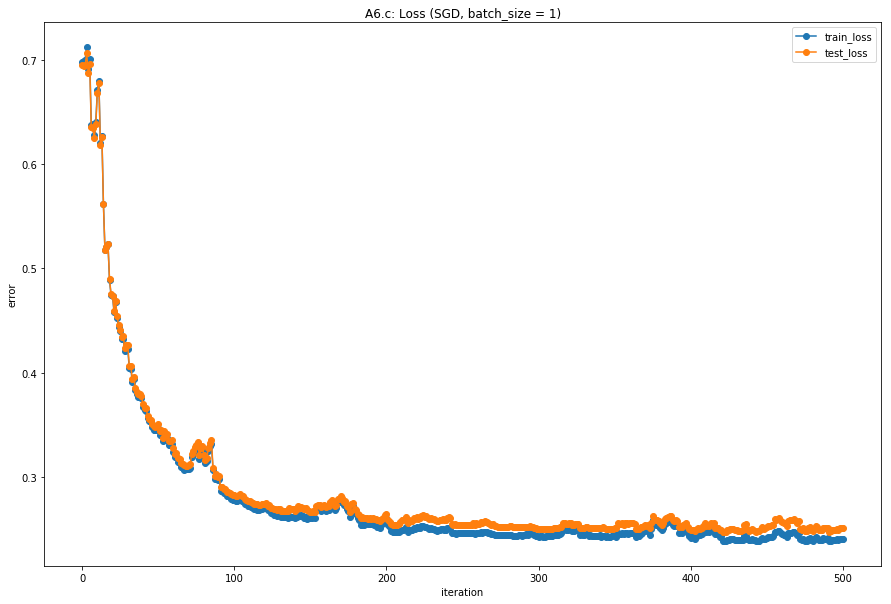

In [14]:
#Part c1
train_loss = conv_history
test_loss = [J(w, b, X_test, y_test, reg_lambda = 0.1) for w, b in zip(w_history, b_history)]

plt.figure(figsize = (15,10))
plt.plot(train_loss, '-o', label = 'train_loss')
plt.plot(test_loss, '-o', label = 'test_loss')
plt.title('A6.c: Loss (SGD, batch_size = 1)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6c1.pdf')
plt.show()

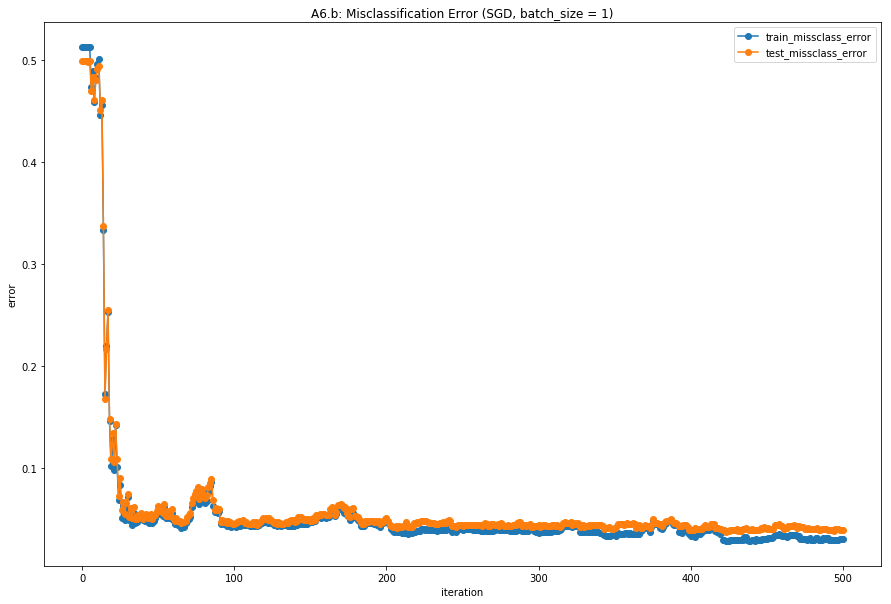

In [15]:
#Part c2
y_pred_train = [predict(w, b, X_train) for w, b in zip(w_history, b_history)]
train_missclass_error = [accuracy_error(y_train, y_pred) for y_pred in y_pred_train]

y_pred_test = [predict(w, b, X_test) for w, b in zip(w_history, b_history)]
test_missclass_error = [accuracy_error(y_test, y_pred) for y_pred in y_pred_test]

plt.figure(figsize = (15,10))
plt.plot(train_missclass_error, '-o', label = 'train_missclass_error')
plt.plot(test_missclass_error, '-o', label = 'test_missclass_error')
plt.title('A6.b: Misclassification Error (SGD, batch_size = 1)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6c2.pdf')
plt.show()

In [16]:
w, b, conv_history, w_history, b_history = SGD(step = 0.01, batch_size = 100, X = X_train, y = y_train, max_iter = 500)

Iter  10 Loss:  0.5520403101698871
Iter  20 Loss:  0.4621147055011744
Iter  30 Loss:  0.40545017225215907
Iter  40 Loss:  0.3667969651770074
Iter  50 Loss:  0.3400148824831153
Iter  60 Loss:  0.3190513435350794
Iter  70 Loss:  0.303505483350506
Iter  80 Loss:  0.29148118849508275
Iter  90 Loss:  0.281943827300567
Iter  100 Loss:  0.27482277279079964
Iter  110 Loss:  0.26859312467706364
Iter  120 Loss:  0.2636010270039897
Iter  130 Loss:  0.25943667889051547
Iter  140 Loss:  0.25617060580482337
Iter  150 Loss:  0.2532999468407284
Iter  160 Loss:  0.2508312994388129
Iter  170 Loss:  0.24893644384851277
Iter  180 Loss:  0.24713924534057133
Iter  190 Loss:  0.24584856697719992
Iter  200 Loss:  0.24461104633589004
Iter  210 Loss:  0.2434872918858469
Iter  220 Loss:  0.24254799191436932
Iter  230 Loss:  0.24156473980355675
Iter  240 Loss:  0.24092862146818636
Iter  250 Loss:  0.24038110666341617
Iter  260 Loss:  0.23974356840870586
Iter  270 Loss:  0.23929640566191063
Iter  280 Loss:  0.2389

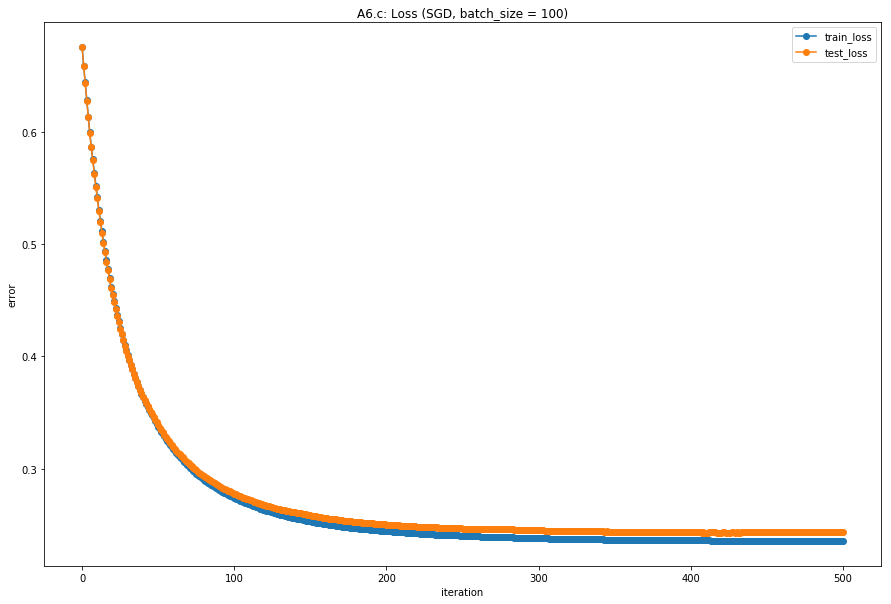

In [17]:
#Part d1
train_loss = conv_history
test_loss = [J(w, b, X_test, y_test, reg_lambda = 0.1) for w, b in zip(w_history, b_history)]

plt.figure(figsize = (15,10))
plt.plot(train_loss, '-o', label = 'train_loss')
plt.plot(test_loss, '-o', label = 'test_loss')
plt.title('A6.c: Loss (SGD, batch_size = 100)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6d1.pdf')
plt.show()

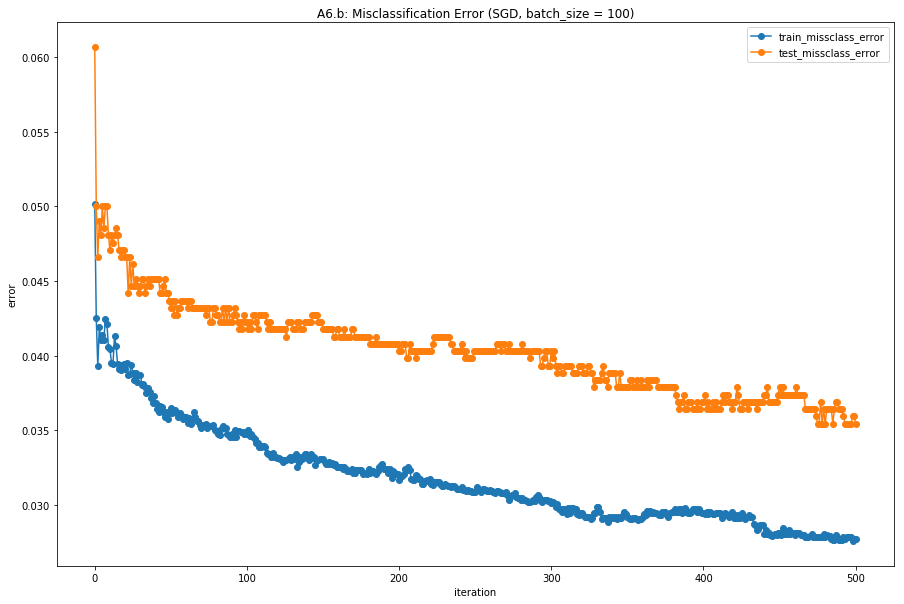

In [18]:
#Part c2
y_pred_train = [predict(w, b, X_train) for w, b in zip(w_history, b_history)]
train_missclass_error = [accuracy_error(y_train, y_pred) for y_pred in y_pred_train]

y_pred_test = [predict(w, b, X_test) for w, b in zip(w_history, b_history)]
test_missclass_error = [accuracy_error(y_test, y_pred) for y_pred in y_pred_test]

plt.figure(figsize = (15,10))
plt.plot(train_missclass_error, '-o', label = 'train_missclass_error')
plt.plot(test_missclass_error, '-o', label = 'test_missclass_error')
plt.title('A6.b: Misclassification Error (SGD, batch_size = 100)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.savefig('figures/A6d2.pdf')
plt.show()